## Project Overview
The objective of this project is to model customers usual spending behavior and location to systematically identify fraudulent spendings from the non-fraudulent ones. The dataset used for this project contains transactions made by european credit cardholders over a period of 2 days in September 2013.

#### What is the approach?
1. Conduct a descriptive analysis of the data and determine if data cleaning is needed
2. Process data for analysis - cleaning and preparation for modeling phase
3. Data exploration
4. Model the data - Try the following modeling techniques: Logistic Regression, SVM, Decision Trees, Random Forest, XGBoost, and Artificial Neural Networks
7. Determine the most skilful model that best model the data
8. Choose a threshold that gives a desirable balance of the false positives and false negatives
6. Formulate results

In [73]:
# Importing the dependencies

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [38]:
# Loading the data
df = pd.read_csv(r'c:\Users\mseno\Desktop\Credit Card Project\Creditcard.csv')


### Data Exploration

In [3]:
# High-level view of the data
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Look into the metadata
df.info() #We do not have any missing values
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# Some basic statistics about the data elements
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Average of variables "time" and "amount"
df[["Time", "Amount"]].mean()


Time      94813.859575
Amount       88.349619
dtype: float64

In [7]:
# Some stats of variables "time" and "amount"
df.agg({'Time': ['min', 'max', 'median', 'skew'],
        'Amount': ['min', 'max', 'median', 'mean']})

,Time,Amount
max,172792.000000,25691.160000
mean,NaN,88.349619
median,84692.000000,22.000000
min,0.000000,0.000000
skew,-0.035568,NaN


In [8]:
# Average of amount by fraud status
df.groupby("Class")["Amount"].mean()

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

In [9]:
# The number of suspicious transactions
# Column "Class" provide a value of '0' for non-fraud and '1' for a fraud
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

# or counter = Counter(df.Class)
# from collections import Counter

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


Not Fraud: 284315
Fraud: 492
Proportion: 577.88 : 1


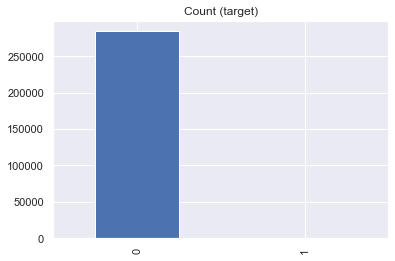

In [10]:
target_count = df.Class.value_counts()
print('Not Fraud:', target_count[0])
print('Fraud:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In the dataset, for 1 fraud there are ~578 non fraud transactions; the dataset is highly unbalanced, the frauds account for 0.173% of all transactions. The data will need to be balanced for an optimal model performance.

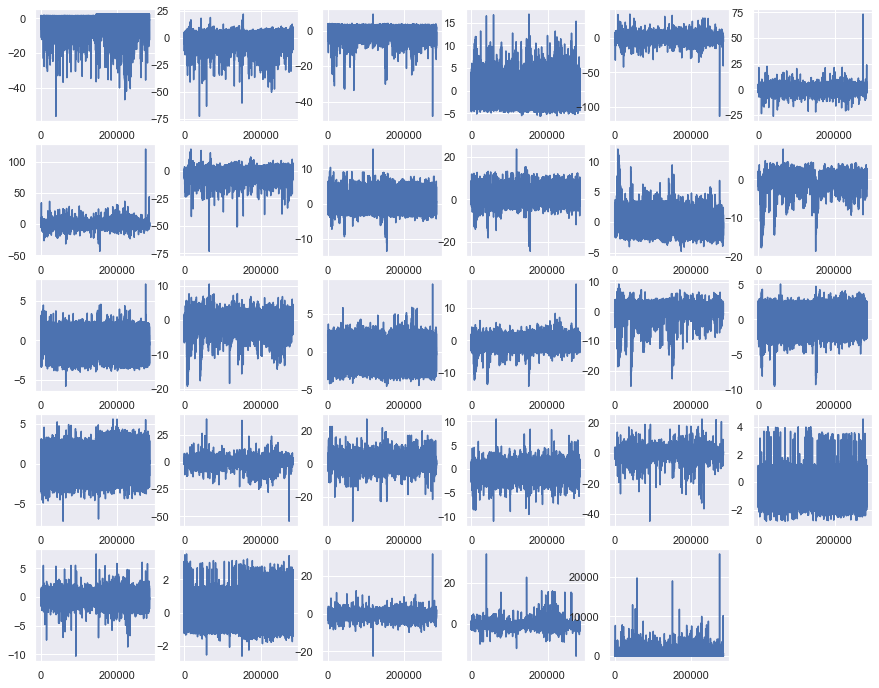

In [11]:
# Plotting the variables
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

### Modeling Techniques Exploration

In [12]:
# Defining the target and predictor variables
target = ['Class']
y = df[target]
# or target = df.iloc[:1, 30: ].columns
# data_target = df[target]

features = ['Time', 'V1', 'V2', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
X = df[features]
# or X = df.drop('Class', axis=1)
# or features = df.iloc[:, 1:30].columns
#     data_features = df[feature_names]

In [13]:
# Split the dataset into training and validation datasets
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state = 1)

In [14]:
# Print datasets sizes
print("Length of train_X is: {train_X}".format(train_X = len(train_X)))
print("Length of train_y is: {train_y}".format(train_y = len(train_y)))
print("Length of val_X is: {val_X}".format(val_X = len(val_X)))
print("Length of val_y is: {val_y}".format(val_y = len(val_y)))

Length of train_X is: 199364
Length of train_y is: 199364
Length of val_X is: 85443
Length of val_y is: 85443


#### 1. Logistic Regression Technique

In [107]:
Logistic_model = LogisticRegression(solver='lbfgs', max_iter=400)
Logistic_model.fit(train_X, train_y.values.ravel())

LogisticRegression(max_iter=400)

In [108]:
# Prediction
Log_val_predictions = Logistic_model.predict(val_X)

In [109]:
# Is our model still predicting just one class?
print( np.unique( Log_val_predictions ) )
#This model is predicting 0 and 1, which means it's not ignoring the minority class in favor of the majority class.

[0 1]


[[85292    16]
 [   57    78]]


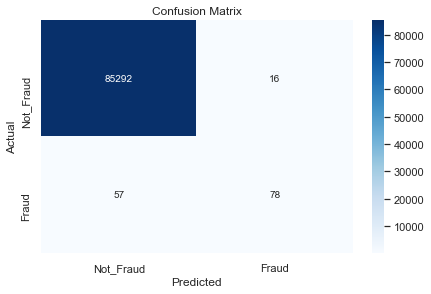

In [110]:
### Confusion Matrix ### 
# It is a performance measurement for machine learning classification. 
# Results can be used to determine metrics such as Recall, Precision, and Accuracy. Note: Since the data is unbalanced, accuracy will most likely not be a relevant performance metric.

# Visualize the prediction results
class_names = ['Not_Fraud', 'Fraud']
matrix = confusion_matrix(val_y, Log_val_predictions)
print(metrics.confusion_matrix(val_y, Log_val_predictions))

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar="Blues", cmap="Blues", fmt = 'g')

plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual"), plt.xlabel("Predicted")
plt.show()

# TN=85292 TP= 78 FP= 16 FN= 57 

#### a. Evaluation Metrics

In [111]:
# Some important scalar metrics
print(metrics.classification_report(val_y, Log_val_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.83      0.58      0.68       135

    accuracy                           1.00     85443
   macro avg       0.91      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [112]:
# Precision: Positive predictive value. It describes how good a model is at predicting the positive class. How many selected instances are relevant. Proportion of true positives out of all detected postives. Or Percentage of the results which are relevant, in other words how many selected instances are relevant. Out of all the positive classes, predicted correctly, how many are actually positive. TP/(TP+FP)
# Recall: Sensivity. It describes how good the model is at predicting the positive class when the actual outcome is positive. How many relevant instances are selected. Number of true positives that are correctly classified. Or Percentage of total relevant results correctly classified by your algorithm, in other words how many relevant instances are selected. Out of all the positive classes, how much was predicted correctly. It should be high as possible. TP/(TP+TN)
# Accuracy: Out of all the classes, how much we predicted correctly. It should be high as possible. (TP+TN)/Total
# F-measure: Harmonic mean of precision and recall. It is difficult to compare two models with low precision and high recall or vice versa. F-score helps to measure Recall and Precision at the same time. (2*Recall*Precision)/Recall+Precision

print( '\033[1m' + "Logistic Regression Summary Metrics")
print ('\033[0m')
print("Precision is: %.2f%%" % round(precision_score(val_y, Log_val_predictions)*100, 2))
print("Recall    is: %.2f%%" % round(recall_score(val_y, Log_val_predictions)*100, 2))
print("Accuracy  is: %.2f%%" % round(accuracy_score(val_y, Log_val_predictions)*100, 2))
print("F1-score  is: %.2f%%" % round(f1_score(val_y, Log_val_predictions)*100, 2))
print('\n')


Logistic Regression Summary Metrics

Precision is: 82.98%
Recall    is: 57.78%
Accuracy  is: 99.91%
F1-score  is: 68.12%




A 99.91% accuracy means that 99.91% of the data is accurately classified. It signals that the model is mostly prediction non-fraud instances. It might be the result of the unbalanced data. It might be misleading and not be useful to assess the quality of the model.
We will assess the model with a single feature to validate the hypothesis.

In [21]:
# let's run the model, but using only one feature (which should drastically reduce the accuracy of the classifier)
Logistic_model = LogisticRegression(solver='lbfgs', max_iter=400)
Logistic_model.fit(train_X[['V20']], train_y.values.ravel())
Log_val_predictions = Logistic_model.predict(val_X[['V20']])
print("Accuracy  is: %.2f%%" % round(accuracy_score(val_y, Log_val_predictions)*100, 2))


Accuracy  is: 99.84%


The accuracy of model with one feature 99.84% vs accuracy of model with all features 99.91%.
The 99.91% high accuracy rate was just an illusion as it barely fluctuated.

Let's explore additional evaluation metrics.
A Matthews Correlation Coefficient, AUROC (Area Under ROC Curve), and Normalized Gini Coefficient might be more appropriate as it is a more robust and adequate metric for imbalanced datasets. MCC ranges from -1 to 1. Normalized Gini Coefficient ranges from approximately 0 for random guessing, to approximately 0.5 for a perfect score.

In [22]:
# Matthews Correlation Coefficient.
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(val_y, Log_val_predictions)


-0.00013609316095458923

MCC takes into account all four values in the confusion matrix - TP, TN, FP, FN. It is the correlation coefficient between the observed and predicted binary classifications
A high MCC value (close to 1) means that both classes are predicted well, even if one class is disproportionately under or over represented.
An ~0.0 MCC means that the classification of Not_Fraud and Fraud by this model is no better than a random flip of a fair coin.

In [23]:
# Normalized Gini Coefficient
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.integrate


def gini(val_y, Log_val_predictions):
    assert (len(val_y) == len(Log_val_predictions))
    all = np.asarray(np.c_[val_y, Log_val_predictions, np.arange(len(val_y))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(val_y) + 1) / 2.
    return giniSum / len(val_y)


def gini_normalized(val_y, Log_val_predictions):
    return gini(val_y, Log_val_predictions) / gini(val_y, Log_val_predictions)

# Gini coefficient for the prediction
gini_predictions = gini(val_y, Log_val_predictions)
gini_max = gini(val_y, val_y)
ngini= gini_normalized(val_y, Log_val_predictions)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.005, Max. Gini: 0.499, Normalized Gini: 1.000


#### Address the fact that the class is imbalanced

In [24]:
# Resampling
# Up-sample Minority Class
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=284315,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Class.value_counts()

# Over-sampling duplicate random records from the minority class, which can cause overfitting

1    284315
0    284315
Name: Class, dtype: int64

In [25]:
# Define a training and test dataset for the upsampling technique
# Defining the target and predictor variables
target_up = ['Class']
y_up = df_upsampled[target_up]

features_up = ['Time', 'V1', 'V2', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
X_up = df_upsampled[features_up]

# Split the dataset into training and validation datasets
train_X_up, val_X_up, train_y_up, val_y_up = train_test_split(X_up, y_up, train_size=0.70, test_size=0.30, random_state = 1)

[[82467  2947]
 [ 7248 77927]]


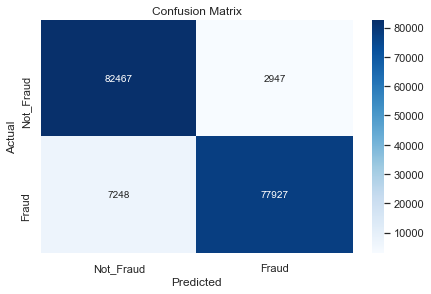

Logistic Regression Summary Metrics for Up-sampled training dataset
Precision is: 96.36%
Recall    is: 91.49%
Accuracy  is: 94.02%
F1-score  is: 93.86%




In [26]:
# Train data on upsampled dataset
Logistic_model_up = LogisticRegression(solver='lbfgs', max_iter=400)
Logistic_model_up.fit(train_X_up, train_y_up.values.ravel())
# Prediction
Log_val_predictions_up = Logistic_model_up.predict(val_X_up)

### Confusion Matrix ### 

# Visualize the prediction results
class_names = ['Not_Fraud', 'Fraud']
matrix_up = confusion_matrix(val_y_up, Log_val_predictions_up)
print(metrics.confusion_matrix(val_y_up, Log_val_predictions_up))

# Create pandas dataframe
dataframe_up = pd.DataFrame(matrix_up, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe_up, annot=True, cbar="Blues", cmap="Blues", fmt = 'g')

plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual"), plt.xlabel("Predicted")
plt.show()

# TN=82467 TP= 77927 FP= 2947 FN= 7248 


print("Logistic Regression Summary Metrics for Up-sampled training dataset")
print("Precision is: %.2f%%" % round(precision_score(val_y_up, Log_val_predictions_up)*100, 2))
print("Recall    is: %.2f%%" % round(recall_score(val_y_up, Log_val_predictions_up)*100, 2))
print("Accuracy  is: %.2f%%" % round(accuracy_score(val_y_up, Log_val_predictions_up)*100, 2))
print("F1-score  is: %.2f%%" % round(f1_score(val_y_up, Log_val_predictions_up)*100, 2))
print('\n')



In [27]:
# Downsample majority class
# Under-sampling involves removing random records from the majority class, which can cause loss of information

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=492,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [28]:
# define a training and test dataset for the downsampling technique
# Defining the target and predictor variables
target_dn = ['Class']
y_dn = df_downsampled[target_dn]


features_dn = ['Time', 'V1', 'V2', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
X_dn = df_downsampled[features_dn]

# Split the dataset into training and validation datasets
train_X_dn, val_X_dn, train_y_dn, val_y_dn = train_test_split(X_dn, y_dn, train_size=0.70, test_size=0.30, random_state = 1)

[[137   5]
 [ 14 140]]


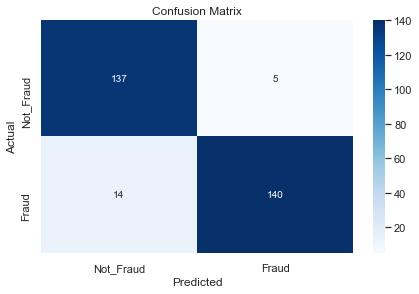

In [29]:

# Train data on downsampled dataset
Logistic_model_dn = LogisticRegression(solver='lbfgs', max_iter=400)
Logistic_model_dn.fit(train_X_dn, train_y_dn.values.ravel())
# Prediction
Log_val_predictions_dn = Logistic_model_dn.predict(val_X_dn)

### Confusion Matrix ### 

# Visualize the prediction results
class_names = ['Not_Fraud', 'Fraud']
matrix_dn = confusion_matrix(val_y_dn, Log_val_predictions_dn)
print(metrics.confusion_matrix(val_y_dn, Log_val_predictions_dn))

# Create pandas dataframe
dataframe_dn = pd.DataFrame(matrix_dn, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe_dn, annot=True, cbar="Blues", cmap="Blues", fmt = 'g')

plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual"), plt.xlabel("Predicted")
plt.show()

# TN=82467 TP= 77927 FP= 2947 FN= 7248 


In [114]:
print("Logistic Regression Summary Metrics for imbalanced training dataset")
print("Precision is: %.2f%%" % round(precision_score(val_y, Log_val_predictions)*100, 2))
print("Recall    is: %.2f%%" % round(recall_score(val_y, Log_val_predictions)*100, 2))
print("Accuracy  is: %.2f%%" % round(accuracy_score(val_y, Log_val_predictions)*100, 2))
print("F1-score  is: %.2f%%" % round(f1_score(val_y, Log_val_predictions)*100, 2))
print('\n')

print("Logistic Regression Summary Metrics for down-sampled training dataset")
print("Precision is: %.2f%%" % round(precision_score(val_y_dn, Log_val_predictions_dn)*100, 2))
print("Recall    is: %.2f%%" % round(recall_score(val_y_dn, Log_val_predictions_dn)*100, 2))
print("Accuracy  is: %.2f%%" % round(accuracy_score(val_y_dn, Log_val_predictions_dn)*100, 2))
print("F1-score  is: %.2f%%" % round(f1_score(val_y_dn, Log_val_predictions_dn)*100, 2))
print('\n')

print("Logistic Regression Summary Metrics for Up-sampled training dataset")
print("Precision is: %.2f%%" % round(precision_score(val_y_up, Log_val_predictions_up)*100, 2))
print("Recall    is: %.2f%%" % round(recall_score(val_y_up, Log_val_predictions_up)*100, 2))
print("Accuracy  is: %.2f%%" % round(accuracy_score(val_y_up, Log_val_predictions_up)*100, 2))
print("F1-score  is: %.2f%%" % round(f1_score(val_y_up, Log_val_predictions_up)*100, 2))
print('\n')



Logistic Regression Summary Metrics for imbalanced training dataset
Precision is: 82.98%
Recall    is: 57.78%
Accuracy  is: 99.91%
F1-score  is: 68.12%


Logistic Regression Summary Metrics for down-sampled training dataset
Precision is: 96.55%
Recall    is: 90.91%
Accuracy  is: 93.58%
F1-score  is: 93.65%


Logistic Regression Summary Metrics for Up-sampled training dataset
Precision is: 96.36%
Recall    is: 91.49%
Accuracy  is: 94.02%
F1-score  is: 93.86%




In [31]:
# Matthews Correlation Coefficient.
from sklearn.metrics import matthews_corrcoef

print("MCC imbalanced: %.2f%%" % round(matthews_corrcoef(val_y, Log_val_predictions)*100, 2))
print("MCC Downsampled: %.2f%%" % round(matthews_corrcoef(val_y_dn, Log_val_predictions_dn)*100, 2))
print("MCC Upsampled: %.2f%%" % round(matthews_corrcoef(val_y_up, Log_val_predictions_up)*100, 2))

MCC imbalanced: -0.01%
MCC Downsampled: 87.33%
MCC Upsampled: 88.16%


Consequently, upsampling seems to be more appropriate for this imbalanced data class. In other words, the logistic regression with upsampled data performs overall better.

- ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
- Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

In [32]:
# ROC on upsampled dataset
train_X_roc, val_X_roc, train_y_roc, val_y_roc = train_test_split(X_up, y_up, test_size=0.50, random_state = 2)

# Generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(val_y_roc))]

# Fit a model
model_roc = LogisticRegression(solver='lbfgs')
model_roc.fit(train_X_roc, train_y_roc.values.ravel())

# Predict probabilities
lr_probs = model_roc.predict_proba(val_X_roc)

# Keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# Calculate scores
ns_auc = roc_auc_score(val_y_roc, ns_probs)
lr_auc = roc_auc_score(val_y_roc, lr_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(val_y_roc, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(val_y_roc, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.974


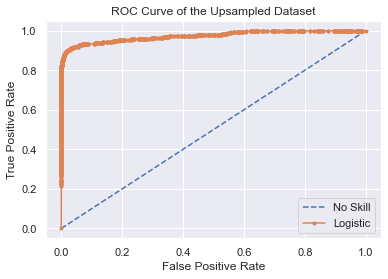

In [33]:
# ROC AUC for the logistic regression model and the no skill classifier that only predicts 0 for all examples
# Plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# Axis labels
plt.title("ROC Curve of the Upsampled Dataset")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# Show the legend
pyplot.legend()

# Show the plot
pyplot.show()

Upsampling Metrics= Logistic: F1=0.938 AUC=0.981


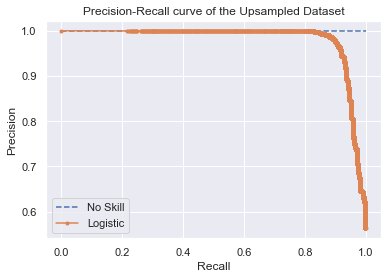

In [119]:
# A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.
# Precision-recall curve and f1
# Fit a model
model_pr = LogisticRegression(solver='lbfgs')
model_pr.fit(train_X_roc, train_y_roc.values.ravel())

# Predict probabilities
lr_probs = model_pr.predict_proba(val_X_roc)

# Keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# Predict class values
yhat = model_pr.predict(val_X_roc)
lr_precision, lr_recall, _ = precision_recall_curve(val_y_roc, lr_probs)
lr_f1, lr_auc = f1_score(val_y_roc, yhat), auc(lr_recall, lr_precision)

# summarize scores
print("Upsampling Metrics=", 'Logistic: F1=%.3f AUC=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(val_y_roc[val_y_roc==1]) / len(val_y_roc)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

# axis labels
plt.title("Precision-Recall curve of the Upsampled Dataset")
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

#### General rules
- AUC for a precision-recall curve summarizes the integral or an approximation of the area under the precision-recall curve. It summarizes the skill of a model across thresholds, like ROC AUC.
- F-Measure summarizes model skill for a specific probability threshold (e.g. 0.5).
- ROC curves is used when there are roughly equal numbers of observations for each class.
- Precision-Recall is be used when there is a moderate to large class imbalance.

#### 2. XGBoost Technique

In [59]:
train_X_xgb = np.array(train_X)
train_y_xgb = np.array(train_y)
val_X_xgb = np.array(val_X)
val_y_xgb = np.array(val_y)

In [103]:
model_xgb = XGBClassifier( max_depth=400, subsample=0.8, colsample_bylevel=0.8, 
                        colsample_bytree=0.8, min_child_weight=1, reg_alpha=0, reg_lambda=1, 
                        n_estimators=400, learning_rate=0.1, random_state=5)
#Changing the random state should not significantly change the model accuracy if it is skilfull.

In [104]:
model_xgb.fit(train_X_xgb, train_y_xgb, early_stopping_rounds=200, 
             eval_set=[(val_X_xgb, val_y_xgb)], verbose=False)

[16:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=400,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
#Make predictions for train data
train_xgb_pred = model_xgb.predict(train_X_xgb)
predictions_xgb = [round(value) for value in train_xgb_pred]

# Make predictions for test data
xgb_pred = model_xgb.predict(val_X_xgb)
predictions = [round(value) for value in xgb_pred]


In [117]:
# Evaluate predictions
print(classification_report(val_y_xgb,predictions))

print('\n')
print("Train Accuracy: %.2f%%" % ((accuracy_score(train_y_xgb, predictions_xgb)) * 100.0))
print("Validation Accuracy: %.2f%%" % ((accuracy_score(val_y_xgb, predictions)) * 100.0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.95      0.77      0.85       135

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



Train Accuracy: 99.98%
Validation Accuracy: 99.96%


In [115]:
print("XGBoost Summary Metrics")
print("Precision is: %.2f%%" % round(precision_score(val_y_xgb,predictions)*100, 2))
print("Recall    is: %.2f%%" % round(recall_score(val_y_xgb,predictions)*100, 2))
print("Accuracy  is: %.2f%%" % round(accuracy_score(val_y_xgb,predictions)*100, 2))
print("F1-score  is: %.2f%%" % round(f1_score(val_y_xgb,predictions)*100, 2))
print('\n')

XGBoost Summary Metrics
Precision is: 95.41%
Recall    is: 77.04%
Accuracy  is: 99.96%
F1-score  is: 85.25%




#### 3. Penalized-SVM Technique

In [ ]:
from sklearn.svm import SVC

# Train model
svm = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
svm.fit(train_X, train_y.values.ravel())

In [97]:
# Predict on training set
svm_predict = svm.predict(val_X)
 
# Is our model still predicting just one class?
print( np.unique( svm_predict ))
 
# How's our accuracy?
print( accuracy_score(val_y, svm_predict) )


[0 1]
0.9887995505775781


In [103]:
 # What about AUROC?
svm_predict = svm.predict_proba(train_X)
svm_predict = [p[1] for p in svm_predict]


AUROC is 0.977659591074165


In [104]:
print( "AUROC is", roc_auc_score(train_y, svm_predict) )

AUROC is 0.977659591074165


#### 4. Decision Tree Technique: Classification and Regression Trees

In [24]:
# What's the number of leafs that provide the least prediction error
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    DecisionTree_model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1) # Define model
    DecisionTree_model.fit(train_X, train_y) # Fit model
    dt_val_predictions = DecisionTree_model.predict(val_X) # get predicted prices on validation data
    mae = mean_absolute_error(val_y, dt_val_predictions) #Model quality: Prediction error for each credit card
    return(mae)

for max_leaf_nodes in [5, 50, 90, 100, 110, 120, 130, 200]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error: {:.8f} %d".format(my_mae) %(max_leaf_nodes, my_mae))
    
# 100 leafs is optimal

Max leaf nodes: 5  		 Mean Absolute Error: 0.00128005 0
Max leaf nodes: 50  		 Mean Absolute Error: 0.00076643 0
Max leaf nodes: 90  		 Mean Absolute Error: 0.00078422 0
Max leaf nodes: 100  		 Mean Absolute Error: 0.00075942 0
Max leaf nodes: 110  		 Mean Absolute Error: 0.00078090 0
Max leaf nodes: 120  		 Mean Absolute Error: 0.00078451 0
Max leaf nodes: 130  		 Mean Absolute Error: 0.00080594 0
Max leaf nodes: 200  		 Mean Absolute Error: 0.00081926 0


In [27]:
# Model with 100 leaves
DecisionTree_model_c = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
DecisionTree_model_c.fit(train_X, train_y)
dt_val_predictions_c = DecisionTree_model_c.predict(val_X)
print(mean_absolute_error(val_y, dt_val_predictions_c))


0.000759420228766441


In [28]:
# Predict for 1 observation
DecisionTree_model_c.predict(val_X.iloc[0].values.reshape(1, -1))

array([5.60063723e-05])

In [29]:
# Predict for multiple observations
DecisionTree_model_c.predict(val_X[0:5])

array([5.60063723e-05, 5.60063723e-05, 5.60063723e-05, 5.60063723e-05,
       3.55691057e-04])

In [ ]:
# Finding precision and recall
print("Decision Tree Summary Metrics")

#### 5. Random Forest

In [106]:
# Define model
#Forest_model = RandomForestRegressor(max_leaf_nodes=100, random_state=1)
Forest_model = RandomForestClassifier()
# Fit model
#Forest_model.fit(train_X, train_y.values.ravel())
Forest_model.fit(train_X, train_y)

# Get predicted prices on validation data
forest_val_predictions = Forest_model.predict(val_X)

# Model quality: Prediction error for each card
print(mean_absolute_error(val_y, forest_val_predictions))

# Accuracy
print( accuracy_score(val_y, forest_val_predictions) )
 
# What about AUROC?
prob_y_rf = Forest_model.predict_proba(val_X)
prob_y_rf = [p[1] for p in prob_y_rf]
print( roc_auc_score(y, prob_y_rf) )

0.0009223119493797595


In [ ]:
# Finding precision and recall
print("Random Forest Summary Metrics")

